Author - Mukut Chakraborty


# Introduction

### Floods have a great deal of destructive potential. Many constructions are unable to withstand the power of water when a river overflows its banks or the sea moves inland. Bridges, buildings, trees, and automobiles may all be lifted and hauled away. Floods erode soil, removing it from beneath a building's foundation and causing it to crack and topple. Recently in May 2022, severe flooding in Assam damaged or destroyed over a million dwellings.

*According to Arupjyoti Saikia (2019), Assam was referred to in ancient literature as a "waterscape" in his acclaimed book The Unquiet River: A Biography of the Brahmaputra. The Brahmaputra's tributaries are so numerous, according to the author, that Assam is claimed to have more rivers than any other region with a comparable size in the globe. By the late 20th century, the annual floods had frequently swamped 40% of the valley's total land area. Without a doubt, more than 40% of the land areas are vulnerable to frequent flooding due to the accelerating rate of global warming and climate change.*


### As someone who was born and raised in Assam, where floods occur on a yearly basis, I chose to work on the topic of monitoring and analysing the impact of floods, as well as forecasting their possible threats in the future.


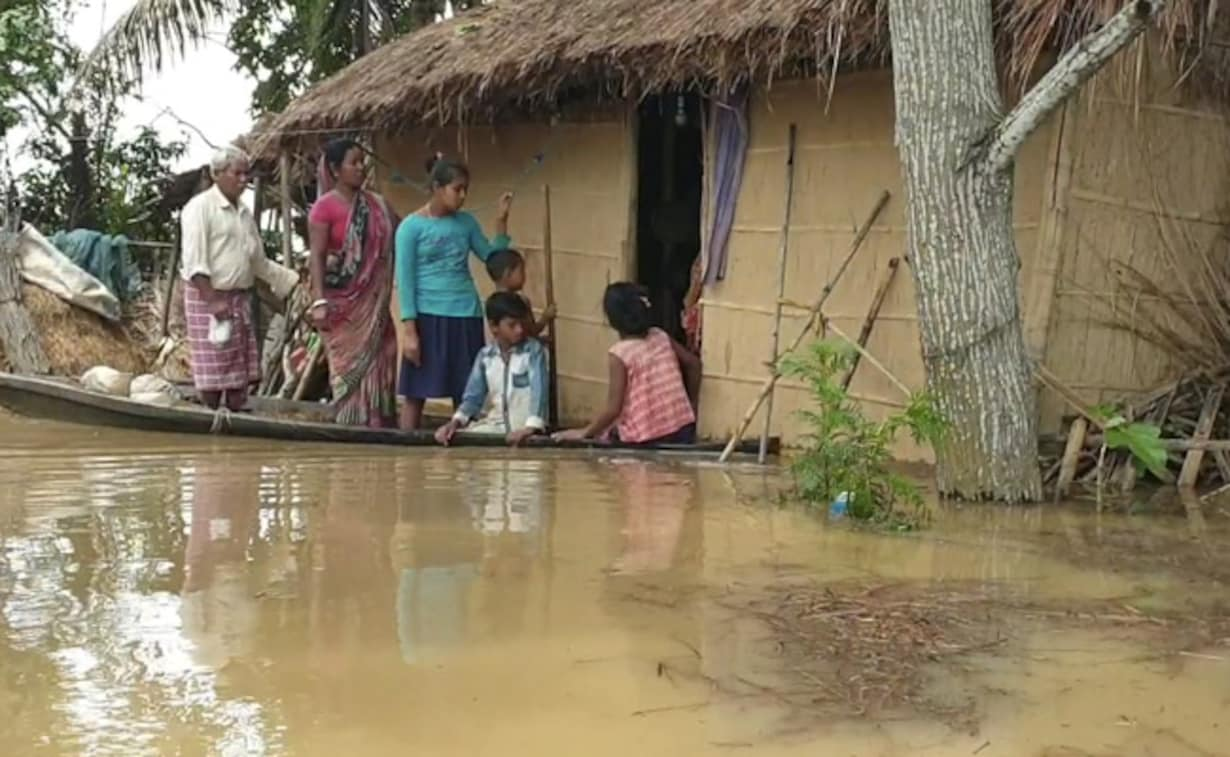

                                     The above image is from the floods of May 2022.

# About Data
  
  Satelite - Sentinel-1A SAR data 
  
  Dates passed - 2022.05.04 - 2022.05.30



# **Pre-Requisites:**

**Note: The below analysis is limited to computational power.** 

Satellite imagery is typically high-resolution and large in size, which requires significant computational resources to process and analyze the data. In addition, flood prediction models often require complex algorithms that need to be run on powerful computing hardware to generate accurate and reliable predictions.

Here are a few examples of the resources needed to monitor and forecast floods using satellite imagery:

**Computational power:** To process the enormous volumes of data involved, flood prediction models need a lot of computational power. High-end servers with several processors and fast memory may fall under this category, as well as specialised computing devices like field programmable gate arrays (FPGAs) or graphics processing units (GPUs) that speed up computations.

**Storage space:** Because satellite imagery often has a big file size, a lot of space is needed to store it. To store and manage the data, this may utilise network attached storage (NAS) or high-capacity hard drives.

**Data transfer:** Since satellite imagery is frequently gathered and stored in far-flung locations, transferring the data to the processing infrastructure for processing demands a sizable amount of bandwidth. To move the data effectively, this may require high-speed internet connections or specialised data transmission networks.

**Visualization software:** To display the results, strong visualisation software is needed because flood prediction models frequently produce massive volumes of data. This can include specialised hardware, such as virtual reality or augmented reality devices to improve the visualisation experience, as well as high-resolution monitors or projectors to show the results.


#**Methodology**


#*Preprocessing:*
**The following are few steps that are involved in preprocessing a Sentinel 1A SAR tiff image:**

1. Decibels (dB) scale conversion: SAR images are often shown in linear scale, which does not offer a strong visual contrast. In order to improve contrast and make it simpler to spot the image's features, the first step in preparing a Sentinel 1A SAR tiff image is to convert the image data to a logarithmic scale (in dB).

2. Speckle filtering: Due to the coherent structure of the SAR signal, speckle noise, a multiplicative noise, affects SAR images. Therefore, the application of a speckle filter as the second step in the preprocessing of a Sentinel 1A SAR tiff image is done to reduce noise and enhance the image's visual quality. Lee, Gamma, and median filters, among others, are a some of the speckle filters that are accessible. The selection of a speckle filter is based on the particular needs of the application.

3. Normalization: Since SAR images frequently contain a large range of pixel values, comparing several images can be challenging. Therefore, normalising the picture data to a particular range, usually between 0 and 1 or -1 and 1, is the third step in preprocessing a Sentinel 1A SAR tiff image. It is simpler to compare several photos when the pixel values have been normalised.

Various libraries, such GDAL, Python, or MATLAB, can be used to implement the aforementioned preprocessing stages.

#*Monitoring and Analysis:*

Typically, remote sensing information from satellites like Sentinel-1 SAR or Landsat-8 is used for flood monitoring. These satellites offer information in a variety of spectral bands that can be utilised to locate and keep tabs on flood disasters. Here are some pointers for displaying bands when monitoring floods:

**Select the proper bands:** Different spectral bands are susceptible to various surface characteristics of the Earth. For instance, the near-infrared band (NIR) of Landsat-8 is sensitive to vegetation, but the blue band (B) is sensitive to aquatic bodies. Therefore, it is crucial to select the right bands for the particular application. The red, green, and blue (RGB) bands are frequently employed in flood monitoring to visualise flood extents and identify water bodies.

**Image enhancement techniques:** Utilize image enhancement techniques to increase the visual quality of the remote sensing data. Contrast stretching, histogram equalization, and colour manipulation are a few of the enhancing methods frequently employed in flood monitoring. These methods can improve the image's contrast and make it simpler to spot the flooded areas.

**False-color composites:** They can be used to see numerous spectral bands in a single image. Red, green, and blue bands, for instance, can be merged to produce an RGB composite image in Landsat-8. In addition, false-color composites that emphasise particular elements, such vegetation or aquatic bodies, can be made using additional band combinations, including the NIR, red, and green bands.

In general, visualising bands in flood monitoring is a crucial stage of remote sensing data analysis. It is feasible to identify and monitor flood episodes more successfully by using the right bands, image enhancing methods, and false-color composites.

#*Prediction*
**In order to anticipate floods, the Otsu algorithm, masking, and flood coverage calculation can be employed as follows:**

Otsu algorithm: The Otsu algorithm is a technique for automatically thresholding images. The approach can be used to divide an image into high- and low-intensity regions, which may correlate to flooded and non-flooded areas, respectively, in the context of flood prediction.

Masking: After the image has been segmented using the Otsu technique, the flooded and non-flooded portions can be distinguished using a mask. Edge detection or colour thresholding are two examples of several methods that can be used to generate the mask.

Flood coverage: Calculating the amount of flood coverage after the mask has been made involves figuring out what proportion of the overall area the flooded regions cover. Using a straightforward formula like:

Flood coverage is equal to 100% multiplied by the ratio of pixels in flooded areas to all pixels.

It is feasible to foresee the intensity and extent of the flood and take the necessary steps to lessen its effects by routinely monitoring the flood coverage throughout time.

*Let's begin:*

In [1]:
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import necessary libraries
from glob import glob
from osgeo import gdal
from skimage import exposure
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
# from rasterio.plot import plotting_extent
# from rasterio.plot import show
# from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
from skimage import filters
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import plotly.graph_objects as go
# from osgeo import gdal
from skimage.filters import median
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

**Before Flood**

In [4]:
#accessing drive for data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/satellite_data

/content/drive/My Drive/satellite_data


In [6]:
# file reading
before_floods = glob("*s1a?*.tiff")
before_floods.sort()
before_floods

['s1a-iw-grd-vv-20220504t120523-20220504t120548-043061-05245f-001.tiff']

In [9]:
# file reading using gdal
before_floods_gdalview = gdal.Open('s1a-iw-grd-vv-20220504t120523-20220504t120548-043061-05245f-001.tiff')
#reading file using pillow
before_floods_pilview = np.array(Image.open('s1a-iw-grd-vv-20220504t120523-20220504t120548-043061-05245f-001.tiff'))

In [6]:
# Get the metadata
metadata = before_floods_gdalview.GetMetadata()

In [7]:
# Read the image data as array
arr_before_floods = before_floods_gdalview.ReadAsArray()

In [8]:
#dB scaling
arr_before_floods = 10 * np.log10(arr_before_floods)

In [10]:
# Apply speckle filtering
filtered_bef = np.zeros_like(arr_before_floods)
for i in range(arr_before_floods.shape[0]):
    filtered_bef[i,:] = median(arr_before_floods[i,:])

In [14]:
# Normalise
min_value = np.min(filtered_bef)
max_value = np.max(filtered_bef)
norm_filtered_bef = (filtered_bef - min_value) / (max_value - min_value)

In [17]:
# Save the preprocessed image to a new tiff file
output_path = 'output/bef_output.tif'
driver = gdal.GetDriverByName('GTiff')
output_ds = driver.Create(output_path, before_floods_gdalview.RasterXSize, before_floods_gdalview.RasterYSize, before_floods_gdalview.RasterCount, gdal.GDT_Float32)
output_ds.SetGeoTransform(before_floods_gdalview.GetGeoTransform())
output_ds.SetProjection(before_floods_gdalview.GetProjection())

0

In [ ]:
#Flush the cache
for i in range(1, before_floods_gdalview.RasterCount + 1):
    band = output_ds.GetRasterBand(i)
    band.WriteArray(arr_before_floods[i-1,:,:])
    band.FlushCache()

Note: The above code consists of many experimental preprocessing steps. Yet preprocessing always varies with inputs and hence few of the above steps were not helpful with the current data. 

# Visualisation

In [7]:
list = []
for i in before_floods:
  with rio.open(i, 'r') as f:
    list.append(f.read(1))
arr_bef = np.stack(list)

In [ ]:
arr_bef.shape

(1, 16726, 25896)

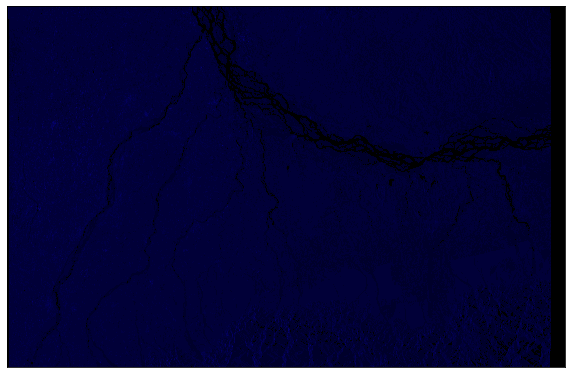

In [8]:
# Visalize Bands

ep.plot_bands(arr_bef, cmap='gist_earth', cols=3, figsize=(10, 10), cbar=False)   

plt.show()

# Grayscale Conversion
Grayscale conversion: Before utilising the flood monitoring technique, we first use the mean function in NumPy to convert the colour TIFF image to grayscale. The Otsu thresholding algorithm can only be used with grayscale images, which explains why.


In [10]:
gray = np.mean(before_floods_pilview, axis=1)

# Otsu Algorithm
The Otsu thresholding algorithm can be used to automatically choose a threshold value for separating a grayscale image's foreground from its background. This code computes the threshold value using the scikit-image threshold_otsu function, then uses NumPy's boolean comparison (>) to apply it to the grayscale image to produce a binary mask.

In [ ]:
thresh = filters.threshold_otsu(gray)
mask = gray > thresh

# Flood Coverage 
Flood coverage can be calculated by adding the elements of the binary mask that separate the flooded and unflooded areas and dividing the result by the total number of pixels in the image.


In [ ]:
coverage = np.sum(mask) / np.prod(mask.shape)

In [ ]:
print(f'Flood coverage: {coverage*100:.2f}%')

Flood coverage: 63.53%


**After Flood**

In [7]:
%cd /content/drive/My Drive/satellite_data/after

/content/drive/My Drive/satellite_data/after


In [4]:
# file reading
after_floods = glob("*s1a?*.tiff")
after_floods.sort()
after_floods

['s1a-iw-grd-vh-20220530t235534-20220530t235559-043447-053018-002.tiff',
 's1a-iw-grd-vv-20220530t235534-20220530t235559-043447-053018-001.tiff']

In [5]:
list2 = []
for i in after_floods:
  with rio.open(i, 'r') as f:
    list2.append(f.read(1))
    
arr_af = np.stack(list2)

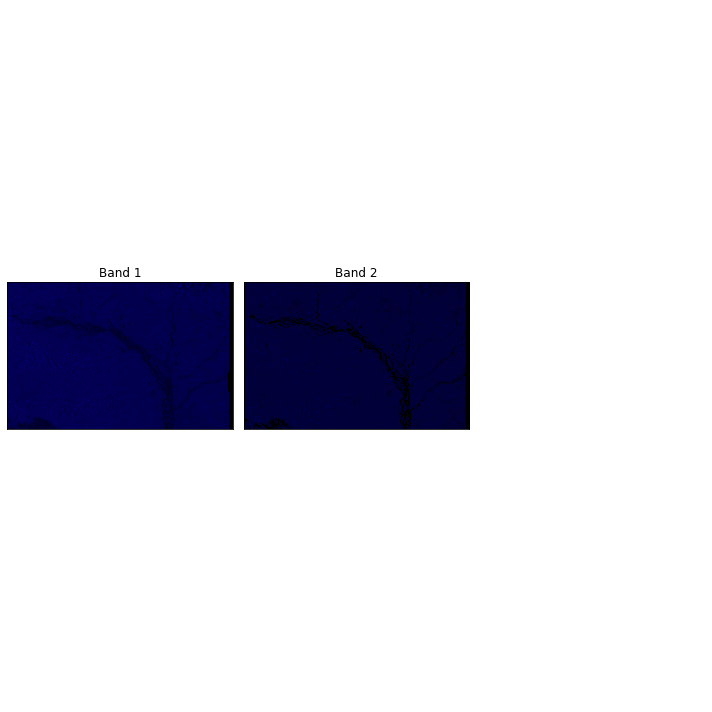

In [14]:
# Visalize Bands

ep.plot_bands(arr_af, cmap='gist_earth', cols=3, figsize=(10, 10), cbar=False)   

plt.show()

In [1]:
# ep.plot_rgb(arr_af, rgb=(), figsize=(10, 10))

# plt.show()
# The above code visualizes RGB Composite Image but can be heavy on the processor

In [8]:
#reading file using pillow
img_af1 = np.array(Image.open('s1a-iw-grd-vv-20220530t235534-20220530t235559-043447-053018-001.tiff'))
img_af2 = np.array(Image.open('s1a-iw-grd-vh-20220530t235534-20220530t235559-043447-053018-002.tiff'))

In [9]:
#Greyscal onversion
gray_af_1 = np.mean(img_af1, axis=1)
gray_af_2 = np.mean(img_af2, axis=1)

In [10]:
#otsu
thresh_af1 = filters.threshold_otsu(gray_af_1)
thresh_af2 = filters.threshold_otsu(gray_af_2)
mask_af1 = gray_af_1 > thresh_af1
mask_af2 = gray_af_2 > thresh_af2

In [11]:
#flood coverage calculation after floods
coverage_af1 = np.sum(mask_af1) / np.prod(mask_af1.shape)
coverage_af2 = np.sum(mask_af2) / np.prod(mask_af2.shape)

In [12]:
print(f'Flood coverage after: {coverage_af1*100:.2f}%')

Flood coverage after: 83.98%


In [13]:
print(f'Flood coverage after: {coverage_af2*100:.2f}%')

Flood coverage after: 80.46%


The overall area that has been impacted by the flood has been estimated in the above study. This has shown how much land has been inundated by floodwaters and gives us an idea of how much damage has been done to infrastructure, agriculture, and other assets.

The amount of land that has been submerged by flood waters on 04.05.2022 is **63.53%** whereas on 30.05.2022 is between **80.46 - 83.98%.**

#**Future Scope:**

Before conducting any operations on the sentinel data, preprocessing is necessary. The **advanced preprocessing measures** comprise the following:

1. Orbit File: The exact observations (taken by the Copernicus exact Orbit Determination (POD) Service) will be updated after about a week because the auxiliary spatial location (position) data linked with the image is not accurate (taken by GNSS). The sentinel products include accurate information that must be used before moving on to further processes.

2. Removal of Thermal Noise : Thermal noise is the noise that results from background energy produced by the SAR receiver and is present in the data. A look table is incorporated in the data products to rectify or eliminate the thermal noise.

3. Radiometric Calibration: Using the calibration coefficients found in the sentinel products, radiometric calibration converts DN values into radiance (radar backscatter of reflected surface).
In the SAR image, the speckle effect creates a granular look with random spatial fluctuations. Usually, it happens as a result of wave interference from various elements' reflected waves. Speckle filtering must be used to get rid of this effect.

4. Terrain Correction: Because SAR data are typically collected at wildly varying angles, there are geometric distortions. Terrain correction therefore seeks to reduce this distortion.

5. Subset: By specifying the geometry, subset is a straightforward method that extracts the area of interest from the entire sensor image.


The widely used software programme ESA SNAP (Sentinel Application Platform), which is used to handle and analyse satellite data, has a plugin called **Snappy**.

The Python library Snappy can be used as it offers users an easy-to-use interface for accessing and modifying satellite photography data. It contains a variety of reading, writing, and processing capabilities for data, including picture classification, spatial and spectral filtering, and data subsetting. Additionally, it enables users to plot and visualise the processed data using a variety of tools.

Various deep learning model trainings(UNET,LinkNet,etc) can be used in image segmentation in order to detect flooding on the images and further to predict flood impacts in th coming years.


Various other environmental data like rainfall, temperature, etc. can be inculcated in order to achieve improved analysis and forcasting results.

                                                          Thank you.
